In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Numerical Data

### Impute by random value

In [7]:
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [8]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [9]:
X_test['Age_Imputed'].isnull().mean()*100

0.0

### check distribution

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

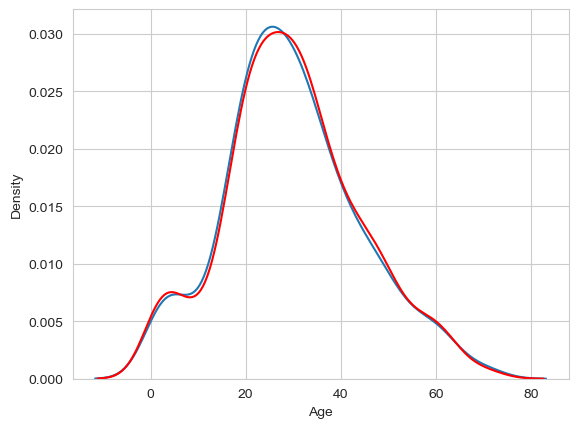

In [10]:
sns.kdeplot(data=X_train,x='Age')
sns.kdeplot(data=X_train,x='Age_Imputed',color='red')


### check variance

In [11]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_Imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  205.0106948495949


In [12]:
X_train[['Fare', 'Age', 'Age_Imputed']].cov()

,Fare,Age,Age_Imputed
Fare,2368.246832,71.512440,49.677034
Age,71.512440,204.349513,204.349513
Age_Imputed,49.677034,204.349513,205.010695


### check boxplot

<Axes: >

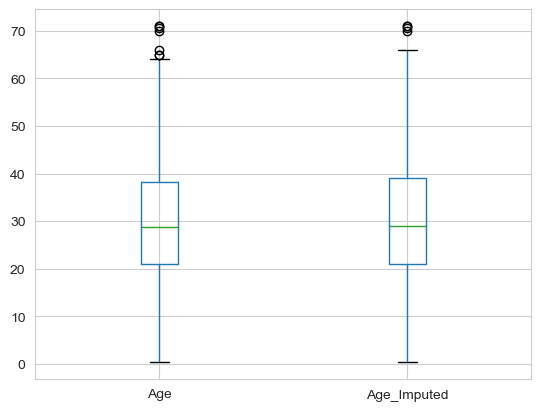

In [13]:
X_train[['Age', 'Age_Imputed']].boxplot()

# Categorical Data

In [14]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [15]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### fill with random value

In [17]:
X_train['GarageQual_Imputed'] = X_train['GarageQual']
X_train['FireplaceQu_Imputed'] = X_train['FireplaceQu']

X_test['GarageQual_Imputed'] = X_test['GarageQual']
X_test['FireplaceQu_Imputed'] = X_test['FireplaceQu']

In [18]:
X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual_Imputed'].isnull().sum()).values
X_train['FireplaceQu_Imputed'][X_train['FireplaceQu_Imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_Imputed'].isnull().sum()).values

X_test['GarageQual_Imputed'][X_test['GarageQual_Imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual_Imputed'].isnull().sum()).values
X_test['FireplaceQu_Imputed'][X_test['FireplaceQu_Imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu_Imputed'].isnull().sum()).values


### check ratio of cat value

In [19]:
ratio = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_Imputed'].value_counts() / len(X_train['GarageQual']),
],axis=1)

ratio.columns = ['before imputation','After imputation']
ratio

,before imputation,After imputation
TA,0.951043,0.946918
Fa,0.037171,0.040240
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


### check all category distribution

In [20]:
X_train['GarageQual'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [26]:
X_train['GarageQual'].value_counts()

GarageQual
TA    1049
Fa      41
Gd      11
Po       1
Ex       1
Name: count, dtype: int64